# 허리디스크 (추간판 탈출증) 환자 현황 분석

## 데이터 출처
### 시도별 집계
* https://www.data.go.kr/data/15089587/fileData.do
### 연령, 성별 집계
* https://www.data.go.kr/data/15072907/fileData.do
<br>
* 추간판 탈출증 질병 코드 M51만 사용

## 라이브러리, 데이터 Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

plt.rc('font', family= 'Malgun Gothic')

lb_2018= pd.read_csv('건강보험심사평가원_3단상병별 시도별 건강보험 진료 통계 2018.csv', encoding= 'CP949')
lb_2019= pd.read_csv('건강보험심사평가원_3단상병별 시도별 건강보험 진료 통계 2019.csv', encoding= 'CP949')
lb_2020= pd.read_csv('건강보험심사평가원_3단상병별 시도별 건강보험 진료 통계 2020.csv', encoding= 'CP949')

print(lb_2018.shape, lb_2019.shape, lb_2020.shape)

(26718, 8) (26782, 8) (26820, 8)


### 허리디스크 데이터만 추출
* 주상병코드 == M51

In [2]:
lb_2018.head()

,진료년도,주상병코드,시도 구분,환자수,명세서 청구건수,입내원일수,요양급여비용총액,보험자부담금
0,2018,A00,서울,19,21,29,2057360,1618160
1,2018,A00,부산,7,7,39,8536620,6966680
2,2018,A00,인천,8,8,10,1104810,806590
3,2018,A00,대구,2,2,5,750470,628960
4,2018,A00,광주,4,4,4,105160,68460


In [3]:
lb_2018= lb_2018[lb_2018['주상병코드']== 'M51']
lb_2019= lb_2019[lb_2019['주상병코드']== 'M51']
lb_2020= lb_2020[lb_2020['주상병코드']== 'M51']

print(lb_2018.shape, lb_2019.shape, lb_2020.shape)

(17, 8) (17, 8) (17, 8)


### 2018~2020년 데이터 통합

In [4]:
lb= pd.concat([lb_2018, lb_2019, lb_2020])
lb.shape

(51, 8)

In [5]:
lb.head()

,진료년도,주상병코드,시도 구분,환자수,명세서 청구건수,입내원일수,요양급여비용총액,보험자부담금
15256,2018,M51,서울,405055,2014737,2274238,124302244910,87928411830
15257,2018,M51,부산,136177,703310,853286,49253687170,35530141100
15258,2018,M51,인천,125169,648994,778332,43590701320,31219070800
15259,2018,M51,대구,110562,502747,578597,34858401620,24695342440
15260,2018,M51,광주,66171,296063,410139,26533298880,19576340300


# 연도별 허리디스크 환자 수

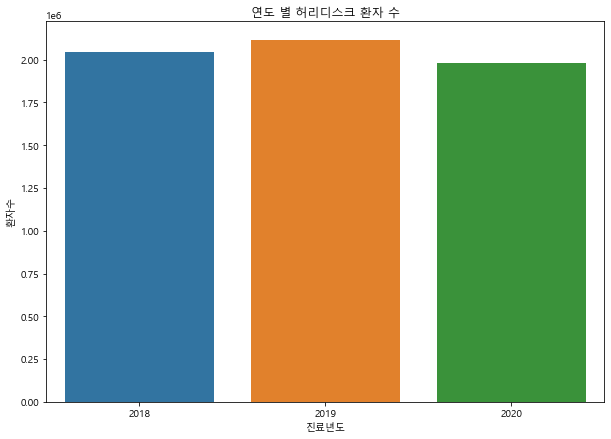

In [6]:
total_pat= lb.groupby('진료년도')['환자수'].sum().reset_index()
plt.figure(figsize= (10, 7))
plt.title('연도 별 허리디스크 환자 수')
sns.barplot(data= total_pat, x= '진료년도', y= '환자수')
plt.show()

* 감소

### 연도별 환자 수 순위

In [7]:
pat_city= lb.groupby(['진료년도', '시도 구분'])['환자수'].sum().reset_index()
pat_city.head()

,진료년도,시도 구분,환자수
0,2018,강원,59456
1,2018,경기,474310
2,2018,경남,130972
3,2018,경북,91194
4,2018,광주,66171


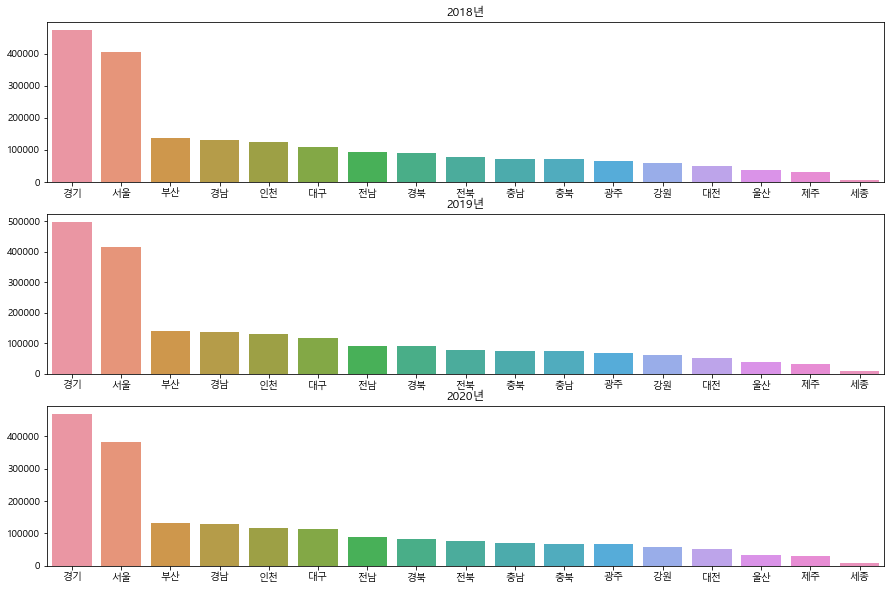

In [8]:
fig, ax= plt.subplots(3, 1, figsize= (15, 10))
a= sns.barplot(data= pat_city[pat_city['진료년도']== 2018].sort_values(by= '환자수', ascending= False), x= '시도 구분', y= '환자수', ax= ax[0])
a.set_title('2018년')
a.set_xlabel('')
a.set_ylabel('')

b= sns.barplot(data= pat_city[pat_city['진료년도']== 2019].sort_values(by= '환자수', ascending= False), x= '시도 구분', y= '환자수', ax= ax[1])
b.set_title('2019년')
b.set_xlabel('')
b.set_ylabel('')

c= sns.barplot(data= pat_city[pat_city['진료년도']== 2020].sort_values(by= '환자수', ascending= False), x= '시도 구분', y= '환자수', ax= ax[2])
c.set_title('2020년')
c.set_xlabel('')
c.set_ylabel('')
plt.show()

* 2018~2020년 모두 경기, 서울, 부산이 허리디스크 환자 수 상위를 기록
* 경기, 서울의 환자 수가 압도적으로 많음
* 다수의 국민이 수도권에 거주하는 것이 원인으로 추정

### 시, 도 별 환자 수

In [9]:
lb['시도 구분'].nunique()

17

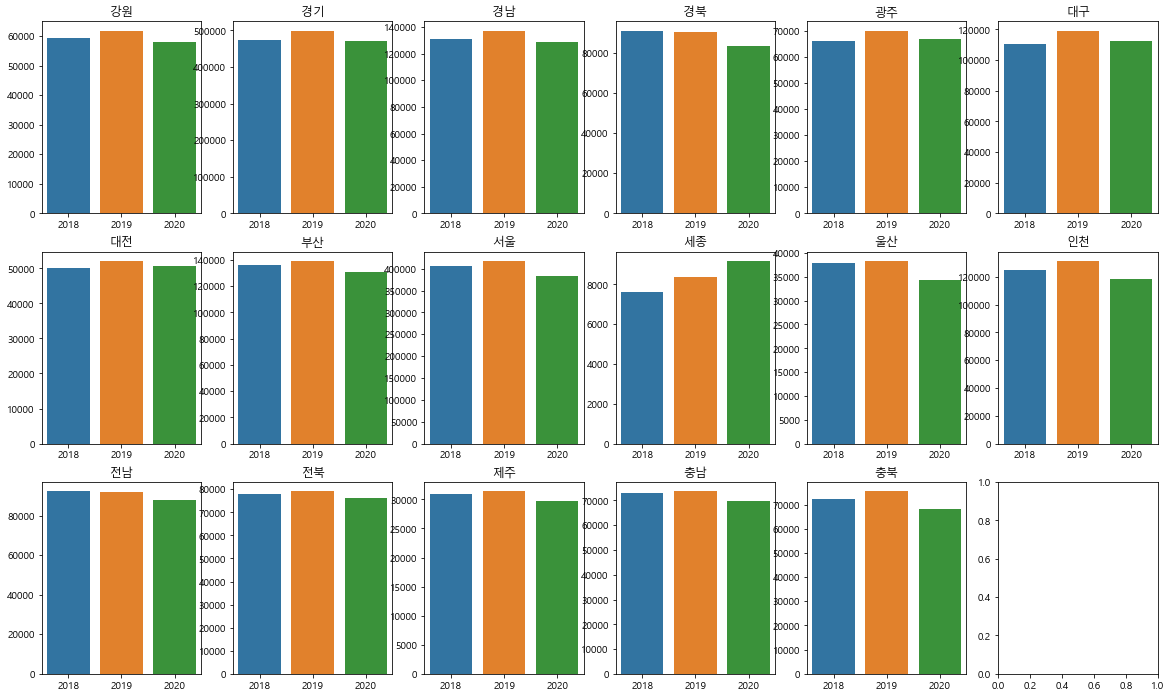

In [10]:
cities= pat_city['시도 구분'].unique().tolist()

fig, ax= plt.subplots(3, 6, figsize= (20, 12))

for i in range(0, 17) :
    if i< 6 :
        sns.barplot(data= pat_city[pat_city['시도 구분']== cities[i]], x= '진료년도', y= '환자수', ax= ax[i// 6, i% 6])
        ax[i// 6, i% 6].title.set_text(cities[i])
        ax[i// 6, i% 6].set_xlabel('')
        ax[i// 6, i% 6].set_ylabel('')
    elif i>= 6 & i< 12 :
        sns.barplot(data= pat_city[pat_city['시도 구분']== cities[i]], x= '진료년도', y= '환자수', ax= ax[i// 6, i% 6])
        ax[i// 6, i% 6].title.set_text(cities[i])
        ax[i// 6, i% 6].set_xlabel('')
        ax[i// 6, i% 6].set_ylabel('')
    else :
        sns.barplot(data= pat_city[pat_city['시도 구분']== cities[i]], x= '진료년도', y= '환자수', ax= ax[i// 6, i% 6])
        ax[i// 6, i% 6].title.set_text(cities[i])
        ax[i// 6, i% 6].set_xlabel('')
        ax[i// 6, i% 6].set_ylabel('')

* 대부분 지역의 환자수가 감소하는 추세임
* 세종시 전체 환자 수는 가장 적지만 유일하게 상승하는 모습을 보임

## 환자 1인당 평균 입내원일수
* 허리디스크로 인해 병원을 다니는 빈도
* 1년에 병원 진료를 몇 번 받는지?
* 2회 이상 입내원할 시 재발로 간주

In [11]:
lb.head()

,진료년도,주상병코드,시도 구분,환자수,명세서 청구건수,입내원일수,요양급여비용총액,보험자부담금
15256,2018,M51,서울,405055,2014737,2274238,124302244910,87928411830
15257,2018,M51,부산,136177,703310,853286,49253687170,35530141100
15258,2018,M51,인천,125169,648994,778332,43590701320,31219070800
15259,2018,M51,대구,110562,502747,578597,34858401620,24695342440
15260,2018,M51,광주,66171,296063,410139,26533298880,19576340300


### 연도별 평균입내원일수 (1인당)

In [12]:
lb_1= lb[['진료년도', '시도 구분', '환자수', '입내원일수']]
lb_1['평균입내원일수']= lb_1['입내원일수']/ lb_1['환자수']
lb_1.head()

,진료년도,시도 구분,환자수,입내원일수,평균입내원일수
15256,2018,서울,405055,2274238,5.614640
15257,2018,부산,136177,853286,6.266007
15258,2018,인천,125169,778332,6.218249
15259,2018,대구,110562,578597,5.233236
15260,2018,광주,66171,410139,6.198168


In [14]:
mean_diag= lb_1.groupby('진료년도')['평균입내원일수'].mean().reset_index()
mean_diag.head()

,진료년도,평균입내원일수
0,2018,6.095251
1,2019,5.967192
2,2020,5.805792


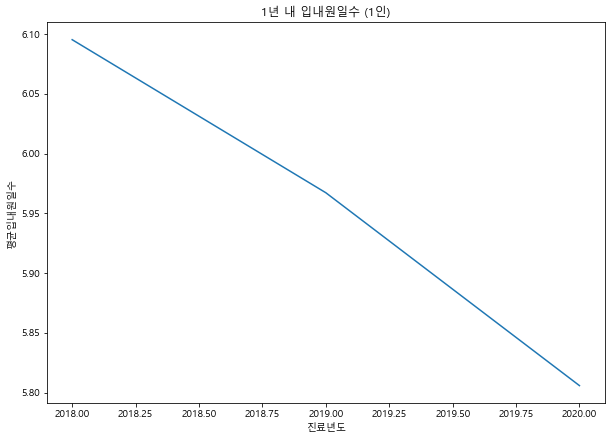

In [22]:
plt.figure(figsize= (10, 7))
sns.factorplot(data= mean_diag, x= '진료년도', y= '평균입내원일수')
plt.title('1년 내 입내원일수 (1인)')
plt.show()

* 1인당 1년 내 입내원일수는 그다지 감소하지 않음
* 환자 한명이 1년에 2회 이상 가는 것은 허리디스크의 재발을 의미
* 재발하는 환자가 많았던 것으로 추정

In [18]:
lb_1.head()

,진료년도,시도 구분,환자수,입내원일수,평균입내원일수
15256,2018,서울,405055,2274238,5.614640
15257,2018,부산,136177,853286,6.266007
15258,2018,인천,125169,778332,6.218249
15259,2018,대구,110562,578597,5.233236
15260,2018,광주,66171,410139,6.198168


### 도시 별 평균입내원일수 (1인당, 연도별)

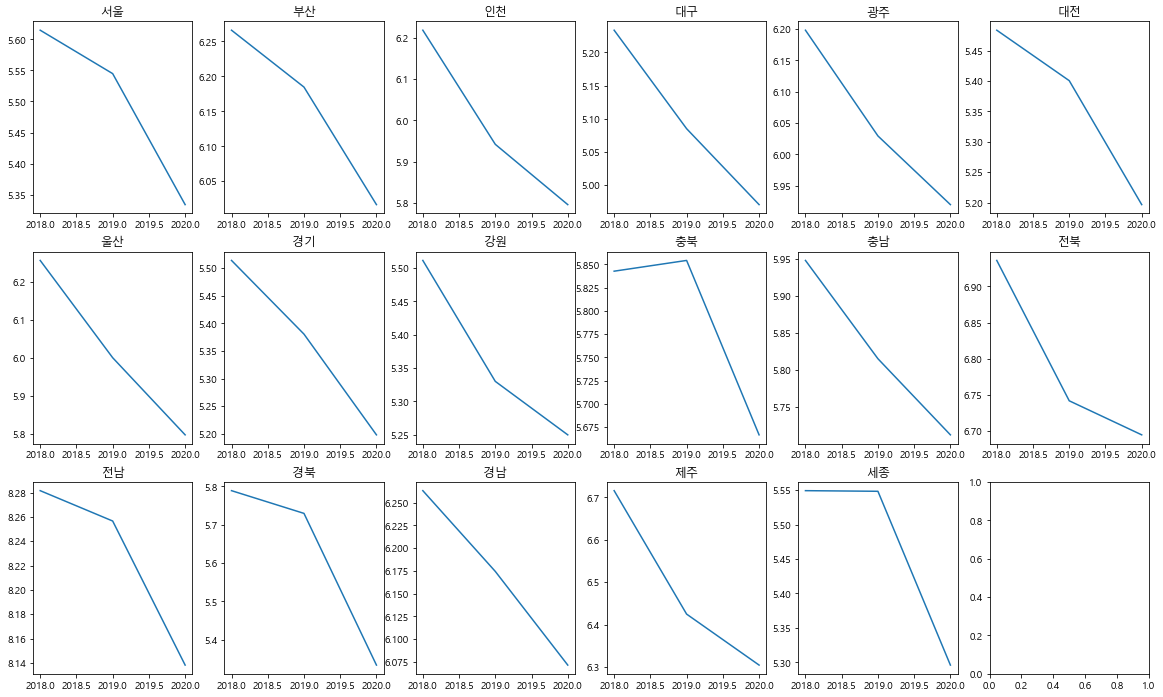

In [26]:
cities= lb_1['시도 구분'].unique().tolist()

fig, ax= plt.subplots(3, 6, figsize= (20, 12))

for i in range(0, 17) :
    if i< 6 :
        sns.lineplot(data= lb_1[lb_1['시도 구분']== cities[i]], x= '진료년도', y= '평균입내원일수', ax= ax[i// 6, i% 6])
        ax[i// 6, i% 6].title.set_text(cities[i])
        ax[i// 6, i% 6].set_xlabel('')
        ax[i// 6, i% 6].set_ylabel('')
    elif i>= 6 & i< 12 :
        sns.lineplot(data= lb_1[lb_1['시도 구분']== cities[i]], x= '진료년도', y= '평균입내원일수', ax= ax[i// 6, i% 6])
        ax[i// 6, i% 6].title.set_text(cities[i])
        ax[i// 6, i% 6].set_xlabel('')
        ax[i// 6, i% 6].set_ylabel('')
    else :
        sns.lineplot(data= lb_1[lb_1['시도 구분']== cities[i]], x= '진료년도', y= '평균입내원일수', ax= ax[i// 6, i% 6])
        ax[i// 6, i% 6].title.set_text(cities[i])
        ax[i// 6, i% 6].set_xlabel('')
        ax[i// 6, i% 6].set_ylabel('')

* 대부분 평균입내원일수가 지속적으로 감소함
* 세종시는 총 환자는 증가했지만 재발 환자가 감소함
* 재발 환자가 감소한다는 긍정적인 현상으로 보임

### 연도별 평균 입내원일수 순위

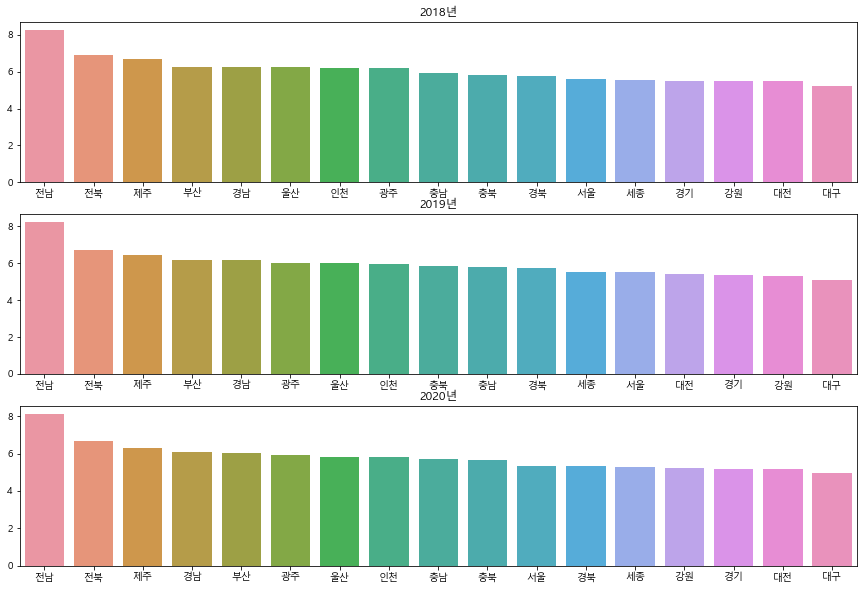

In [28]:
fig, ax= plt.subplots(3, 1, figsize= (15, 10))
a= sns.barplot(data= lb_1[lb_1['진료년도']== 2018].sort_values(by= '평균입내원일수', ascending= False), x= '시도 구분', y= '평균입내원일수', ax= ax[0])
a.set_title('2018년')
a.set_xlabel('')
a.set_ylabel('')

b= sns.barplot(data= lb_1[lb_1['진료년도']== 2019].sort_values(by= '평균입내원일수', ascending= False), x= '시도 구분', y= '평균입내원일수', ax= ax[1])
b.set_title('2019년')
b.set_xlabel('')
b.set_ylabel('')

c= sns.barplot(data= lb_1[lb_1['진료년도']== 2020].sort_values(by= '평균입내원일수', ascending= False), x= '시도 구분', y= '평균입내원일수', ax= ax[2])
c.set_title('2020년')
c.set_xlabel('')
c.set_ylabel('')
plt.show()

* 총 환자수 순위와는 전혀 다른 양상을 보임
* 지방 환자들은 허리디스크로 인해 1년에 6~8회 입내원함
* 낙후된 의료 시설, 높은 연령층이 원인일 것으로 추정

## 성별, 연령별 데이터 Import

In [30]:
age_gender_18= pd.read_csv('건강보험심사평가원_3단상병별 성별 연령군별 통계 2018.csv', encoding= 'CP949')
age_gender_19= pd.read_csv('건강보험심사평가원_3단상병별 성별 연령군별 통계 2019.csv', encoding= 'CP949')
age_gender_20= pd.read_csv('건강보험심사평가원_3단상병별 성별 연령군별 통계 2020.csv', encoding= 'CP949')

print(age_gender_18.shape, age_gender_19.shape, age_gender_20.shape)

(51164, 8) (51037, 8) (50874, 8)


In [31]:
age_gender_18.head()

,진료년도,주상병코드,성별,연령군,환자수,명세서 청구건수,요양급여비용총액,보험자부담금
0,2018,A00,남,01_0~4세,2,2,40550,27150
1,2018,A00,남,02_5~9세,3,3,58040,40340
2,2018,A00,남,03_10~14세,2,2,31650,17450
3,2018,A00,남,05_20~24세,2,2,123710,65110
4,2018,A00,남,06_25~29세,1,1,41810,29310


In [32]:
age_gender_18= age_gender_18[age_gender_18['주상병코드']== 'M51']
age_gender_19= age_gender_19[age_gender_19['주상병코드']== 'M51']
age_gender_20= age_gender_20[age_gender_20['주상병코드']== 'M51']

age_gender= pd.concat([age_gender_18, age_gender_19, age_gender_20])

age_gender.shape

(108, 8)

### 연령군 컬럼 전처리

In [37]:
age_gender['연령군']= age_gender['연령군'].str.slice(3, )
age_gender.head()

,진료년도,주상병코드,성별,연령군,환자수,명세서 청구건수,요양급여비용총액,보험자부담금
31080,2018,M51,남,0~4세,5,5,3.669000e+05,2.460000e+05
31081,2018,M51,남,5~9세,60,199,4.678790e+06,3.164440e+06
31082,2018,M51,남,10~14세,1217,4782,2.312674e+08,1.740650e+08
31083,2018,M51,남,15~19세,14510,59801,3.577316e+09,2.502682e+09
31084,2018,M51,남,20~24세,37547,151687,9.421820e+09,6.542676e+09


### 환자의 성별 비율

In [41]:
year_gender= age_gender.groupby(['진료년도', '성별'])['환자수'].sum().reset_index()
year_gender

,진료년도,성별,환자수
0,2018,남,897174
1,2018,여,1131064
2,2019,남,935435
3,2019,여,1170451
4,2020,남,895180
5,2020,여,1079003


<AxesSubplot:title={'center':'2020년 환자 성비'}, ylabel='환자수'>

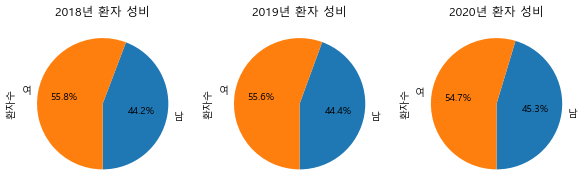

In [66]:
fig, ax= plt.subplots(1, 3, figsize= (10, 7))

year_gender[year_gender['진료년도']== 2018]['환자수'].plot.pie(labels= ['남', '여'], autopct= '%1.1f%%', startangle= 270, ax= ax[0], title= '2018년 환자 성비')
year_gender[year_gender['진료년도']== 2019]['환자수'].plot.pie(labels= ['남', '여'], autopct= '%1.1f%%', startangle= 270, ax= ax[1], title= '2019년 환자 성비')
year_gender[year_gender['진료년도']== 2020]['환자수'].plot.pie(labels= ['남', '여'], autopct= '%1.1f%%', startangle= 270, ax= ax[2], title= '2020년 환자 성비')

* 매 년 여성이 남성보다 추간판 탈출증을 많이 겪음